In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
from datetime import datetime, timedelta, date

In [2]:
customers=pd.read_csv("E:\\CS\\AnalytixLabs 2022 December\\Data Science 360\\Python\\Python Foundation End to End Case Study E-Commerce Analytics Project\\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\\CUSTOMERS.csv")
geo_location=pd.read_csv("E:\\CS\\AnalytixLabs 2022 December\\Data Science 360\\Python\\Python Foundation End to End Case Study E-Commerce Analytics Project\\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\\GEO_LOCATION.csv")
order_items=pd.read_csv("E:\\CS\\AnalytixLabs 2022 December\\Data Science 360\\Python\\Python Foundation End to End Case Study E-Commerce Analytics Project\\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\\ORDER_ITEMS.csv")
order_payments=pd.read_csv("E:\\CS\AnalytixLabs 2022 December\\Data Science 360\\Python\\Python Foundation End to End Case Study E-Commerce Analytics Project\\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\\ORDER_PAYMENTS.csv")
order_review_ratings=pd.read_csv("E:\\CS\\AnalytixLabs 2022 December\\Data Science 360\\Python\\Python Foundation End to End Case Study E-Commerce Analytics Project\\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\\ORDER_REVIEW_RATINGS.csv")
orders=pd.read_csv("E:\\CS\\AnalytixLabs 2022 December\\Data Science 360\\Python\\Python Foundation End to End Case Study E-Commerce Analytics Project\\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\\ORDERS.csv")
products=pd.read_csv("E:\\CS\AnalytixLabs 2022 December\\Data Science 360\\Python\\Python Foundation End to End Case Study E-Commerce Analytics Project\\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\\PRODUCTS.csv")
sellers=pd.read_csv("E:\\CS\\AnalytixLabs 2022 December\\Data Science 360\\Python\\Python Foundation End to End Case Study E-Commerce Analytics Project\\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\\SELLERS.csv")

In [3]:
customers.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh


In [4]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [6]:
geo_location.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh
1,1046,-23.546081,-46.644820,Akkarampalle,Andhra Pradesh
2,1041,-23.544392,-46.639499,Akkarampalle,Andhra Pradesh
3,1035,-23.541578,-46.641607,Akkarampalle,Andhra Pradesh
4,1012,-23.547762,-46.635361,Akkarampalle,Andhra Pradesh


In [7]:
geo_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19015 entries, 0 to 19014
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  19015 non-null  int64  
 1   geolocation_lat              19015 non-null  float64
 2   geolocation_lng              19015 non-null  float64
 3   geolocation_city             19015 non-null  object 
 4   geolocation_state            19015 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 742.9+ KB


In [8]:
geo_location.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh
1,1046,-23.546081,-46.644820,Akkarampalle,Andhra Pradesh
2,1041,-23.544392,-46.639499,Akkarampalle,Andhra Pradesh
3,1035,-23.541578,-46.641607,Akkarampalle,Andhra Pradesh
4,1012,-23.547762,-46.635361,Akkarampalle,Andhra Pradesh


In [9]:
geo_location.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [10]:
order_items.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14


In [11]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [12]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [13]:
order_payments.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [14]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [15]:
order_payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [16]:
order_review_ratings.head(5)

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,3/10/2018 0:00,3/11/2018 3:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2/17/2018 0:00,2/18/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,4/21/2017 0:00,4/21/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,3/1/2018 0:00,3/2/2018 10:26


In [17]:
order_review_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_creation_date     100000 non-null  object
 4   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [18]:
order_review_ratings.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [19]:
orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00


In [20]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [21]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [22]:
products.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,Baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,Housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [23]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32328 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [24]:
products.isna().sum()

product_id                      0
product_category_name         623
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [25]:
sellers.head(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Badepalle,Andhra Pradesh
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Akkarampalle,Andhra Pradesh
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Koratla,Andhra Pradesh


In [26]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3038 non-null   object
 3   seller_state            3038 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [27]:
sellers.isna().sum()

seller_id                  0
seller_zip_code_prefix     0
seller_city               57
seller_state              57
dtype: int64

In [28]:
# Merging

In [29]:
order_payment=order_payments.groupby('order_id').payment_value.sum()
order_review=order_review_ratings.groupby('order_id').review_score.sum()

In [30]:
data=orders.merge(order_payment,on='order_id')

In [31]:
data=data.merge(customers,on='customer_id', how='left')

In [32]:
data2=order_items.merge(products, on='product_id', how='left')

In [33]:
data2=data2.merge(sellers, on='seller_id', how='left')

In [34]:
data=data.merge(data2, on='order_id', how='left')

In [35]:
data=data.merge(order_review,on='order_id', how='left')

In [36]:
data.shape

(113422, 31)

In [37]:
data.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1968
order_delivered_customer_date    3229
order_estimated_delivery_date       0
payment_value                       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
product_category_name            2402
product_name_lenght              2378
product_description_lenght       2378
product_photos_qty               2378
product_weight_g                  793
product_length_cm                 793
product_height_cm                 793
product_widt

In [38]:
data=data.drop(columns=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 
               'shipping_limit_date', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 
               'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix', 'seller_city', 'seller_state'])

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113422 entries, 0 to 113421
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  113422 non-null  object 
 1   customer_id               113422 non-null  object 
 2   order_status              113422 non-null  object 
 3   order_purchase_timestamp  113422 non-null  object 
 4   payment_value             113422 non-null  float64
 5   customer_unique_id        113422 non-null  object 
 6   customer_zip_code_prefix  113422 non-null  int64  
 7   customer_city             113422 non-null  object 
 8   customer_state            113422 non-null  object 
 9   order_item_id             112647 non-null  float64
 10  product_id                112647 non-null  object 
 11  seller_id                 112647 non-null  object 
 12  price                     112647 non-null  float64
 13  freight_value             112647 non-null  f

In [40]:
data.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value,product_category_name,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,38.71,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,Housewares,4
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,141.46,af07308b275d755c9edb36a90c618231,47813,Pandariya,Chhattisgarh,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,Perfumery,4
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,Dhamdha,Chhattisgarh,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,Auto,5
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,72.20,7c142cf63193a1473d2e66489a9ae977,59296,Kartarpur,Punjab,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20,Pet_Shop,5
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,28.62,72632f0f9dd73dfee390c9b22eb56dd6,9195,Bheemavaram,Andhra Pradesh,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,8.72,Stationery,5
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,7/9/2017 21:57,175.26,80bb27c7c16e8f973207a5086ab329e2,86320,Bahraich,Uttar Pradesh,1.0,060cb19345d90064d1015407193c233d,8581055ce74af1daba164fdbd55a40de,147.90,27.36,Auto,4
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,4/11/2017 12:22,65.95,36edbb3fb164b1f16485364b6fb04c73,98900,Paonta Sahib,Himachal Pradesh,1.0,a1804276d9941ac0733cfd409f5206eb,dc8798cbf453b7e0f98745e396cc5616,49.90,16.05,NaN,2
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,5/16/2017 13:10,75.16,932afa1e708222e5821dac9cd5db4cae,26525,Pampore,Jammu & Kashmir,1.0,4520766ec412348b8d4caa5e8a18c464,16090f2ca825584b5a147ab24aa30c86,59.99,15.17,Auto,5
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,1/23/2017 18:29,35.95,39382392765b6dc74812866ee5ee92a7,99655,Puduvayal,Tamil Nadu,1.0,ac1789e492dcd698c5c10b97a671243a,63b9ae557efed31d1f7687917d248a8d,19.90,16.05,Furniture_Decor,1
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,7/29/2017 11:55,169.76,299905e3934e9e181bfb2e164dd4b4f8,18075,Bade Bacheli,Chhattisgarh,1.0,9a78fb9862b10749a117f7fc3c31f051,7c67e1448b00f6e969d365cea6b010ab,149.99,19.77,Office_Furniture,5


In [41]:
#Handling missing values

data.isna().sum()

order_id                       0
customer_id                    0
order_status                   0
order_purchase_timestamp       0
payment_value                  0
customer_unique_id             0
customer_zip_code_prefix       0
customer_city                  0
customer_state                 0
order_item_id                775
product_id                   775
seller_id                    775
price                        775
freight_value                775
product_category_name       2402
review_score                   0
dtype: int64

In [42]:
data.order_item_id.fillna(data.order_item_id.median(), inplace=True)
data.product_id.fillna('Unknown', inplace=True)
data.seller_id.fillna('Unknown', inplace=True)
data.product_category_name.fillna('Unknown', inplace=True)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113422 entries, 0 to 113421
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  113422 non-null  object 
 1   customer_id               113422 non-null  object 
 2   order_status              113422 non-null  object 
 3   order_purchase_timestamp  113422 non-null  object 
 4   payment_value             113422 non-null  float64
 5   customer_unique_id        113422 non-null  object 
 6   customer_zip_code_prefix  113422 non-null  int64  
 7   customer_city             113422 non-null  object 
 8   customer_state            113422 non-null  object 
 9   order_item_id             113422 non-null  float64
 10  product_id                113422 non-null  object 
 11  seller_id                 113422 non-null  object 
 12  price                     112647 non-null  float64
 13  freight_value             112647 non-null  f

In [44]:
data['price']=np.where(data.product_id=='Unknown', data.price.fillna(0), data.price.fillna((data.payment_value)*0.90))

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113422 entries, 0 to 113421
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  113422 non-null  object 
 1   customer_id               113422 non-null  object 
 2   order_status              113422 non-null  object 
 3   order_purchase_timestamp  113422 non-null  object 
 4   payment_value             113422 non-null  float64
 5   customer_unique_id        113422 non-null  object 
 6   customer_zip_code_prefix  113422 non-null  int64  
 7   customer_city             113422 non-null  object 
 8   customer_state            113422 non-null  object 
 9   order_item_id             113422 non-null  float64
 10  product_id                113422 non-null  object 
 11  seller_id                 113422 non-null  object 
 12  price                     113422 non-null  float64
 13  freight_value             112647 non-null  f

In [46]:
data['freight_value']=np.where(data.product_id=='Unknown', data.freight_value.fillna(0), data.freight_value.fillna((data.payment_value)*0.10))

In [47]:
data.isna().sum()

order_id                    0
customer_id                 0
order_status                0
order_purchase_timestamp    0
payment_value               0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
order_item_id               0
product_id                  0
seller_id                   0
price                       0
freight_value               0
product_category_name       0
review_score                0
dtype: int64

In [48]:
# Datatypes

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113422 entries, 0 to 113421
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  113422 non-null  object 
 1   customer_id               113422 non-null  object 
 2   order_status              113422 non-null  object 
 3   order_purchase_timestamp  113422 non-null  object 
 4   payment_value             113422 non-null  float64
 5   customer_unique_id        113422 non-null  object 
 6   customer_zip_code_prefix  113422 non-null  int64  
 7   customer_city             113422 non-null  object 
 8   customer_state            113422 non-null  object 
 9   order_item_id             113422 non-null  float64
 10  product_id                113422 non-null  object 
 11  seller_id                 113422 non-null  object 
 12  price                     113422 non-null  float64
 13  freight_value             113422 non-null  f

In [49]:
data['order_purchase_timestamp']=pd.to_datetime(data.order_purchase_timestamp, format='%m/%d/%Y %H:%M')

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113422 entries, 0 to 113421
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  113422 non-null  object        
 1   customer_id               113422 non-null  object        
 2   order_status              113422 non-null  object        
 3   order_purchase_timestamp  113422 non-null  datetime64[ns]
 4   payment_value             113422 non-null  float64       
 5   customer_unique_id        113422 non-null  object        
 6   customer_zip_code_prefix  113422 non-null  int64         
 7   customer_city             113422 non-null  object        
 8   customer_state            113422 non-null  object        
 9   order_item_id             113422 non-null  float64       
 10  product_id                113422 non-null  object        
 11  seller_id                 113422 non-null  object        
 12  pr

In [51]:
data['year']=data.order_purchase_timestamp.dt.year

In [52]:
data.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value,product_category_name,review_score,year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,38.71,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,Housewares,4,2017
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,141.46,af07308b275d755c9edb36a90c618231,47813,Pandariya,Chhattisgarh,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,Perfumery,4,2018
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,Dhamdha,Chhattisgarh,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,Auto,5,2018


In [53]:
data['month']=data.order_purchase_timestamp.dt.month

In [54]:
data['month_name']=data.order_purchase_timestamp.dt.month_name()

In [55]:
data['day']=data.order_purchase_timestamp.dt.day

In [56]:
data['week']=data.order_purchase_timestamp.dt.weekofyear

C:\Users\NSS\AppData\Local\Temp\ipykernel_12424\3274719626.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['week']=data.order_purchase_timestamp.dt.weekofyear


In [57]:
data['time']=data.order_purchase_timestamp.dt.time

In [58]:
data.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,...,price,freight_value,product_category_name,review_score,year,month,month_name,day,week,time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,38.71,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,1.0,...,29.99,8.72,Housewares,4,2017,10,October,2,40,10:56:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,141.46,af07308b275d755c9edb36a90c618231,47813,Pandariya,Chhattisgarh,1.0,...,118.70,22.76,Perfumery,4,2018,7,July,24,30,20:41:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,Dhamdha,Chhattisgarh,1.0,...,159.90,19.22,Auto,5,2018,8,August,8,32,08:38:00


### 1. Perform Detailed exploratory analysis

#### a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations, Total channels, Total payment methods etc…) 

In [59]:
# Total Revenue

data['Revenue']=data['price']+data['freight_value']
data.Revenue.sum()

15843409.78

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113422 entries, 0 to 113421
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  113422 non-null  object        
 1   customer_id               113422 non-null  object        
 2   order_status              113422 non-null  object        
 3   order_purchase_timestamp  113422 non-null  datetime64[ns]
 4   payment_value             113422 non-null  float64       
 5   customer_unique_id        113422 non-null  object        
 6   customer_zip_code_prefix  113422 non-null  int64         
 7   customer_city             113422 non-null  object        
 8   customer_state            113422 non-null  object        
 9   order_item_id             113422 non-null  float64       
 10  product_id                113422 non-null  object        
 11  seller_id                 113422 non-null  object        
 12  pr

In [61]:
# Total Quantity

data.order_item_id.count()

113422

In [62]:
# Total Products

data.product_id.nunique()

32952

In [63]:
# Total Categories

data.product_category_name.nunique()

72

In [64]:
# Total Sellers

data.seller_id.nunique()

3096

In [65]:
# Total Locations

data.customer_zip_code_prefix.nunique()

14994

In [66]:
# Total Payments Methods

order_payments.payment_type.nunique()

5

#### 2. Understanding how many new customers acquired every month.

In [67]:
new_customers=data.loc[::, ['customer_id', 'year', 'month', 'month_name']]

In [68]:
new_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113422 entries, 0 to 113421
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  113422 non-null  object
 1   year         113422 non-null  int64 
 2   month        113422 non-null  int64 
 3   month_name   113422 non-null  object
dtypes: int64(2), object(2)
memory usage: 4.3+ MB


In [69]:
new_customers.drop_duplicates(subset='customer_id', keep='first', inplace=True)

In [70]:
new_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99440 entries, 0 to 113421
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  99440 non-null  object
 1   year         99440 non-null  int64 
 2   month        99440 non-null  int64 
 3   month_name   99440 non-null  object
dtypes: int64(2), object(2)
memory usage: 3.8+ MB


In [71]:
new_cust=new_customers.groupby(['year','month', 'month_name']).customer_id.count().reset_index()

In [72]:
new_cust.drop(columns='month', inplace=True)

In [73]:
new_cust.rename(columns={'customer_id':'new_customers'}, inplace=True)

In [74]:
new_cust

,year,month_name,new_customers
0,2016,September,3
1,2016,October,324
2,2016,December,1
3,2017,January,800
4,2017,February,1780
5,2017,March,2682
6,2017,April,2404
7,2017,May,3700
8,2017,June,3245
9,2017,July,4026


#### c. Understand the retention of customers on month on month basis

In [75]:
customers_retention=data.loc[::, ['customer_id', 'year', 'month', 'month_name']]

In [76]:
cust_retention=customers_retention[customers_retention.duplicated()]

In [77]:
cust_retention=cust_retention.groupby(['year', 'month', 'month_name']).customer_id.count().reset_index()

In [78]:
cust_retention=cust_retention.drop(columns='month')

In [79]:
cust_retention.rename(columns={'customer_id':'customer_retention_no'}, inplace=True)

In [80]:
cust_retention

,year,month_name,customer_retention_no
0,2016,September,1
1,2016,October,55
2,2017,January,166
3,2017,February,218
4,2017,March,359
5,2017,April,293
6,2017,May,476
7,2017,June,366
8,2017,July,550
9,2017,August,617


#### d. How the revenues from existing/new customers on month on month basis

In [81]:
cust=data.loc[::, ['customer_id','month', 'month_name', 'Revenue']]
cust=cust.drop_duplicates('customer_id')
cust=cust.groupby(['month','month_name']).Revenue.sum().reset_index()
cust.drop(columns='month', inplace=True)
cust

,month_name,Revenue
0,January,1130009.98
1,February,1159947.96
2,March,1450766.99
3,April,1436693.27
4,May,1572699.32
5,June,1398145.23
6,July,1495449.10
7,August,1531814.91
8,September,645029.52
9,October,745435.49


C:\Users\NSS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'New Customer Revenue by Month')

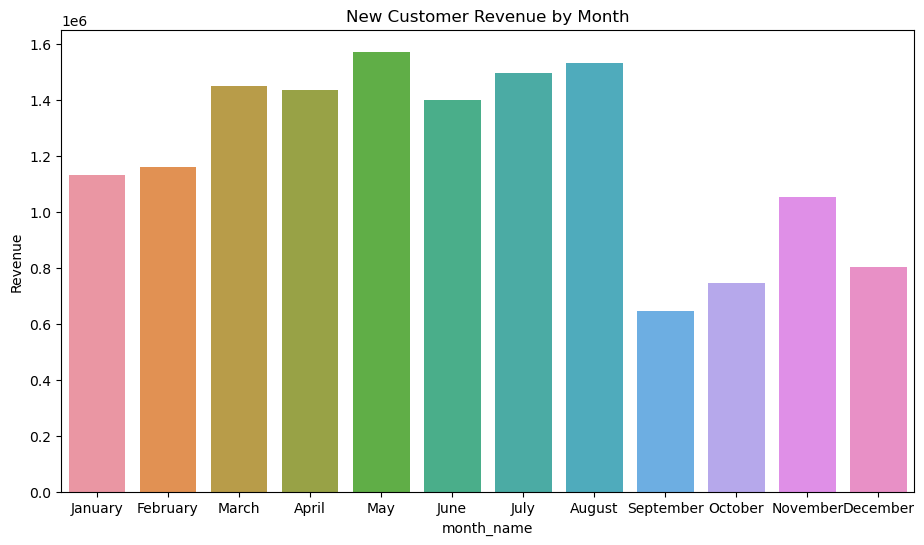

In [82]:
plt.figure(figsize=(11,6))
sns.barplot(cust.month_name, cust.Revenue)
plt.title('New Customer Revenue by Month')

In [83]:
retention_cust=data.loc[::, ['customer_id','month', 'month_name', 'Revenue']]
retention_cust1=retention_cust[retention_cust.duplicated()]
retention_cust1=retention_cust1.groupby(['month','month_name']).Revenue.sum().reset_index()
retention_cust1.drop(columns='month', inplace=True)
retention_cust1

,month_name,Revenue
0,January,85776.17
1,February,94733.89
2,March,110936.63
3,April,104269.81
4,May,127436.67
5,June,97165.98
6,July,115458.63
7,August,98672.65
8,September,64512.20
9,October,63893.52


C:\Users\NSS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Retention Customer Revenue by Month')

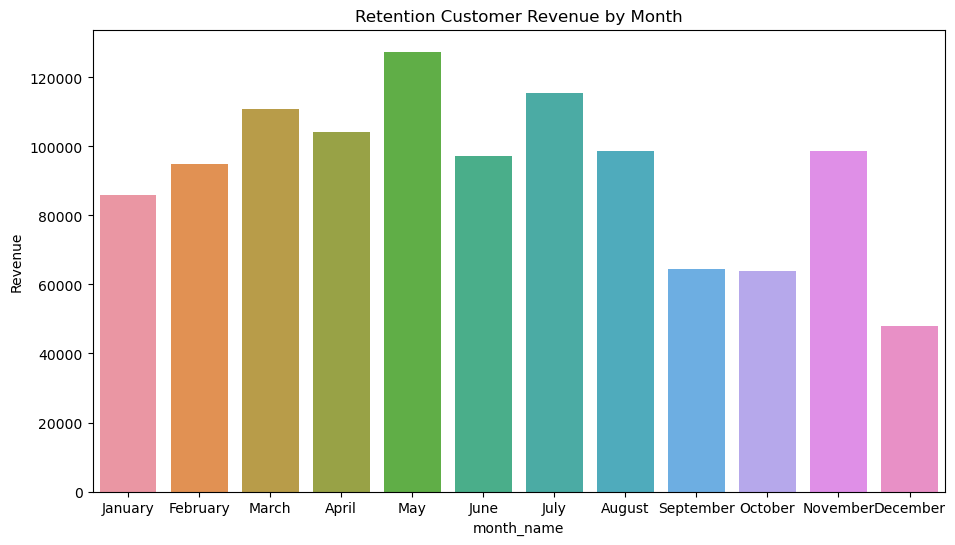

In [84]:
plt.figure(figsize=(11,6))
sns.barplot(retention_cust1.month_name, retention_cust1.Revenue)
plt.title('Retention Customer Revenue by Month')

#### e. Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…

<AxesSubplot:xlabel='Revenue', ylabel='product_category_name'>

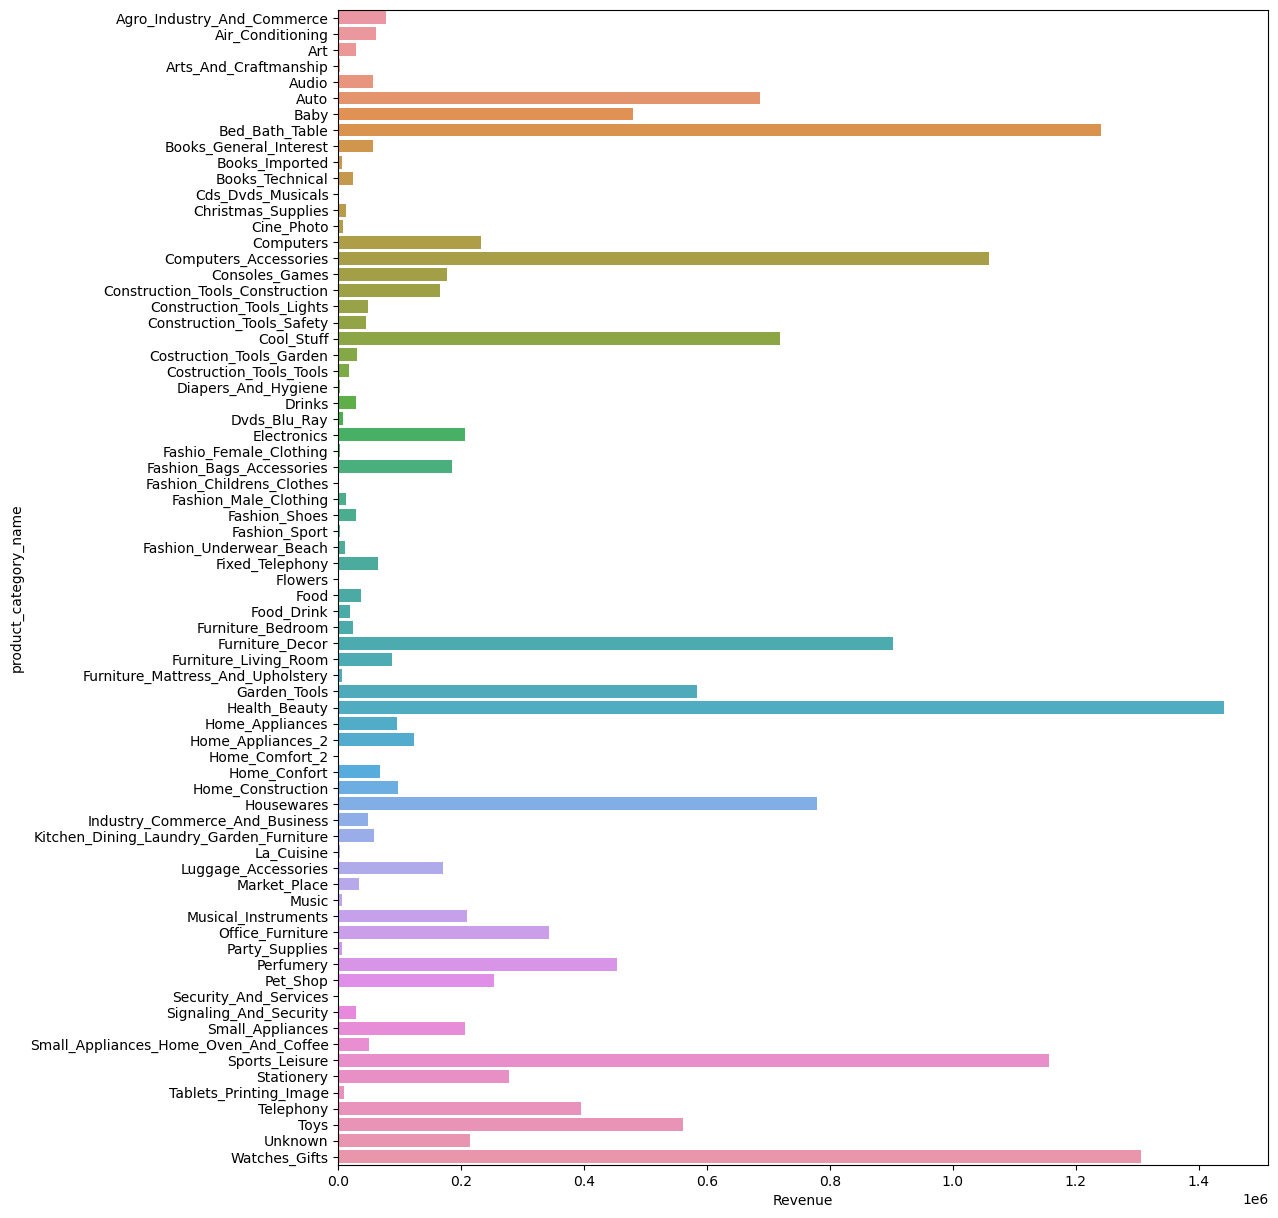

In [85]:
# Sales by Category

plt.figure(figsize=(12, 15))
s2=data.groupby('product_category_name').Revenue.sum().reset_index()
sns.barplot(x='Revenue', y='product_category_name', data=s2)

Text(0.5, 0, 'Quantity')

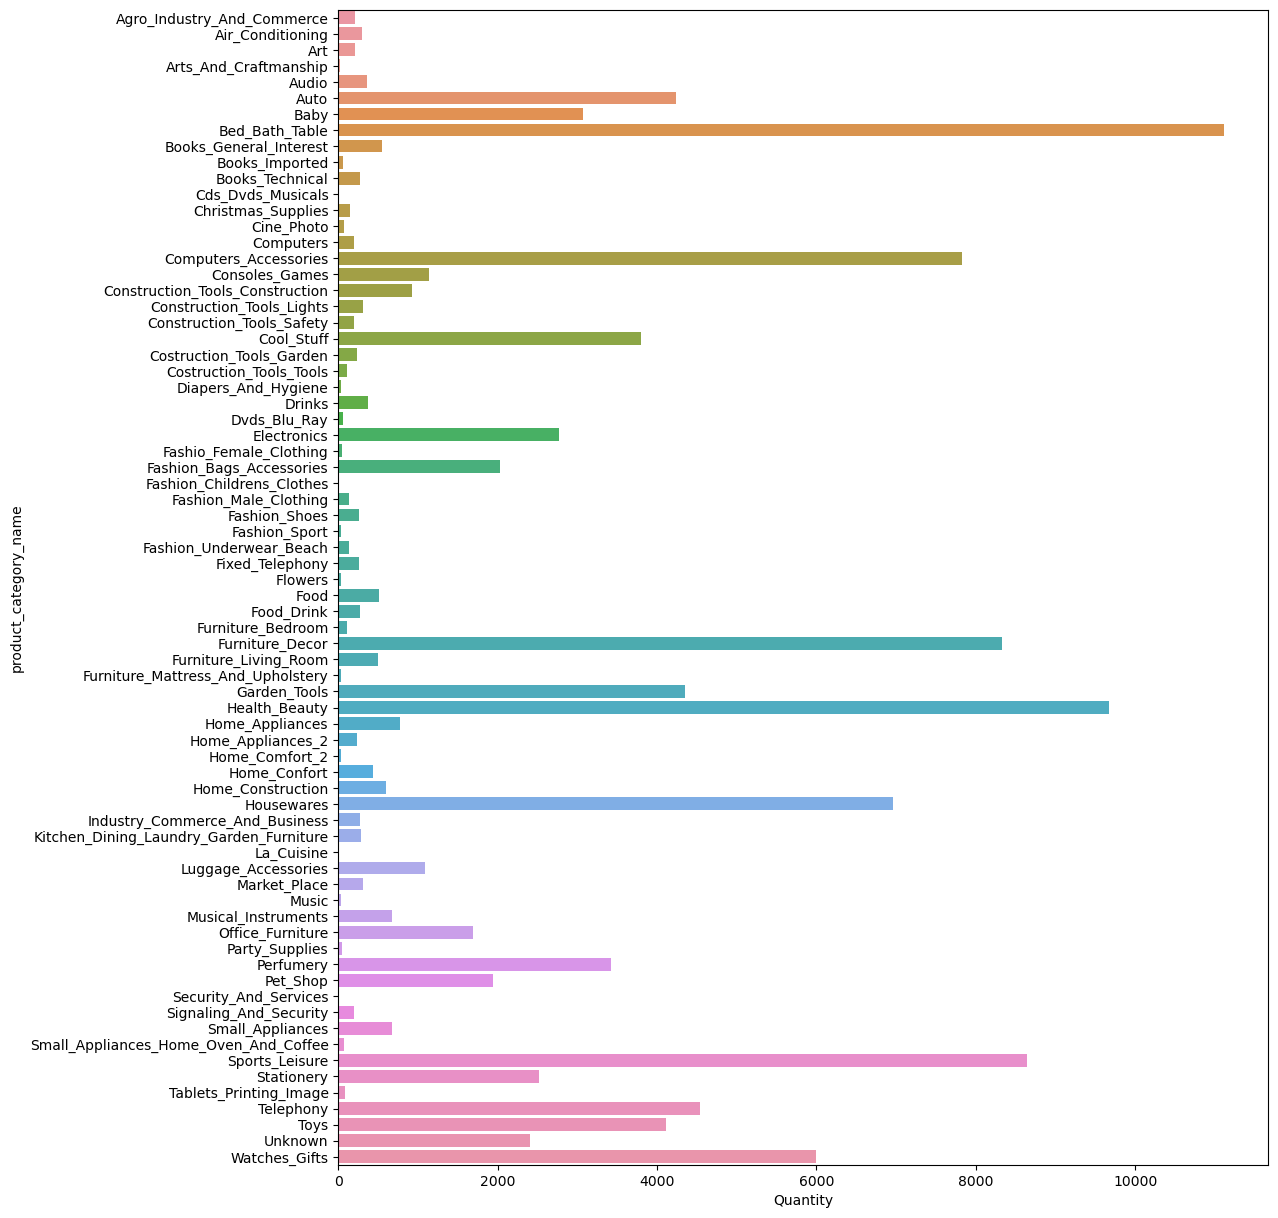

In [86]:
# Quantity by Category

plt.figure(figsize=(12, 15))
d1=data.groupby('product_category_name').order_item_id.count().reset_index()
sns.barplot(x='order_item_id', y='product_category_name', data=d1)
plt.xlabel('Quantity')

<AxesSubplot:xlabel='Revenue', ylabel='customer_state'>

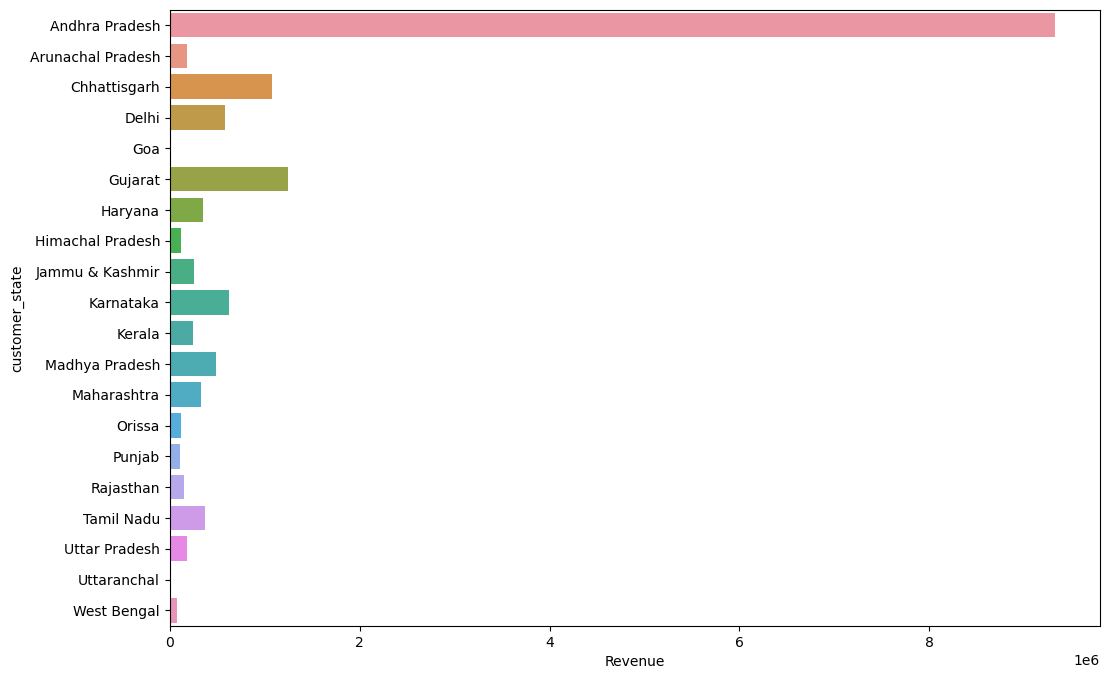

In [87]:
# Sales by Location

plt.figure(figsize=(12, 8))
s4=data.groupby('customer_state').Revenue.sum().reset_index()
sns.barplot(x='Revenue', y='customer_state', data=s4)

Text(0.5, 0, 'Quantity')

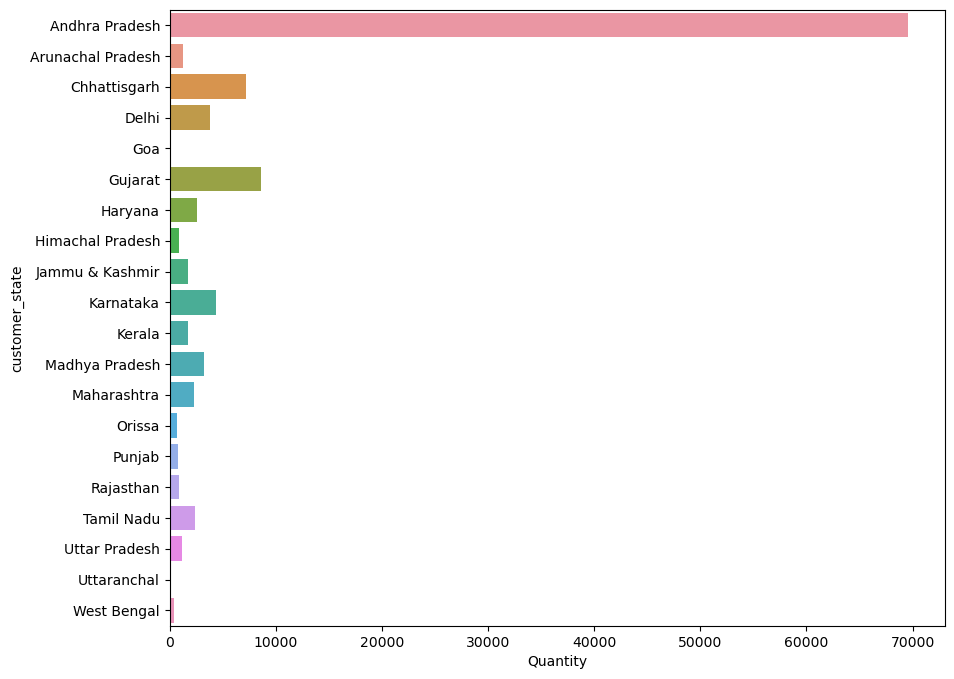

In [88]:
# Quantity by Location

plt.figure(figsize=(10,8))
d2=data.groupby('customer_state').order_item_id.count().reset_index()
sns.barplot(x='order_item_id', y='customer_state', data=d2)
plt.xlabel('Quantity')

<AxesSubplot:xlabel='week', ylabel='Revenue'>

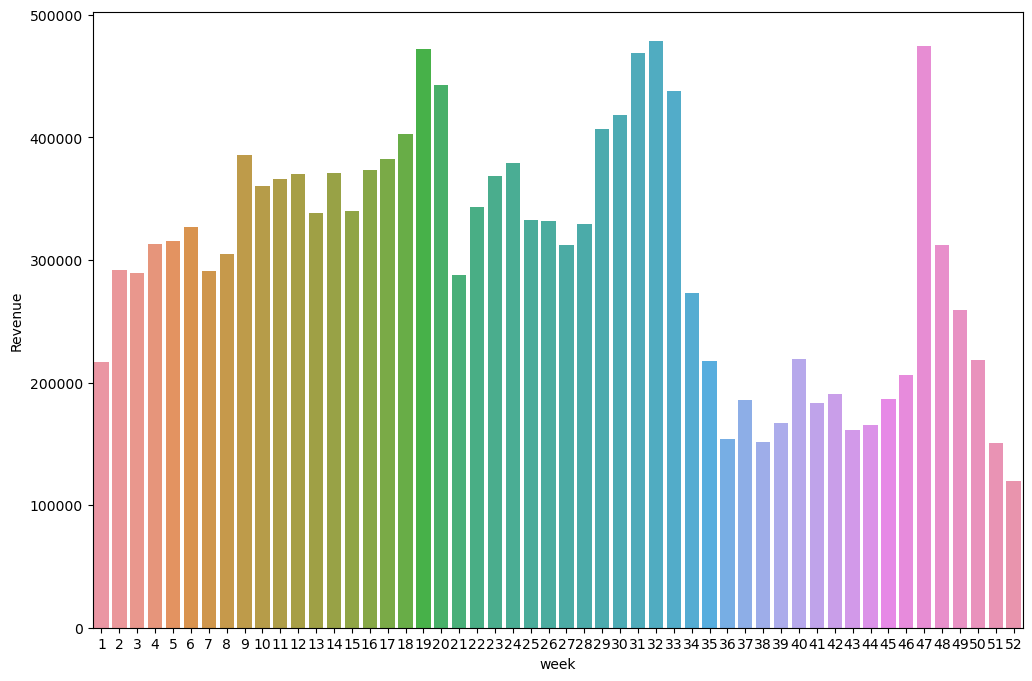

In [89]:
# Sales by Week

plt.figure(figsize=(12, 8))
s5=data.groupby('week').Revenue.sum().reset_index()
sns.barplot(x='week', y='Revenue', data=s5)

Text(0.5, 0, 'Quantity')

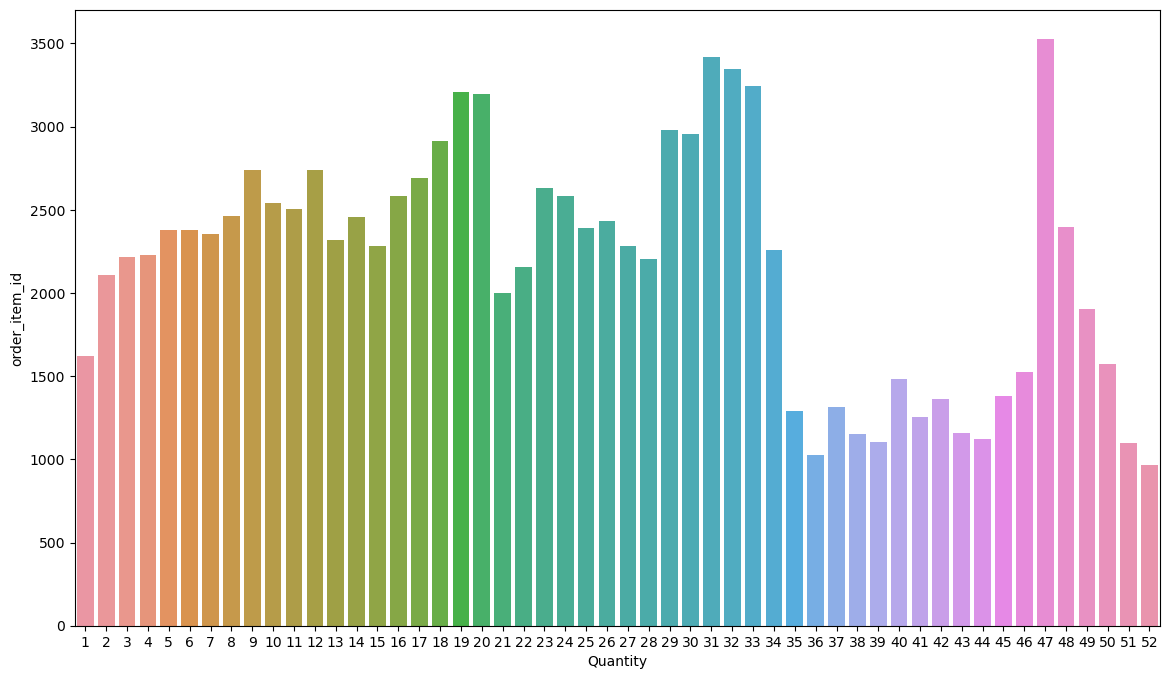

In [90]:
# Quantity by Week

plt.figure(figsize=(14,8))
d3=data.groupby('week').order_item_id.count().reset_index()
sns.barplot(x='week', y='order_item_id', data=d3)
plt.xlabel('Quantity')

<AxesSubplot:xlabel='month_name', ylabel='Revenue'>

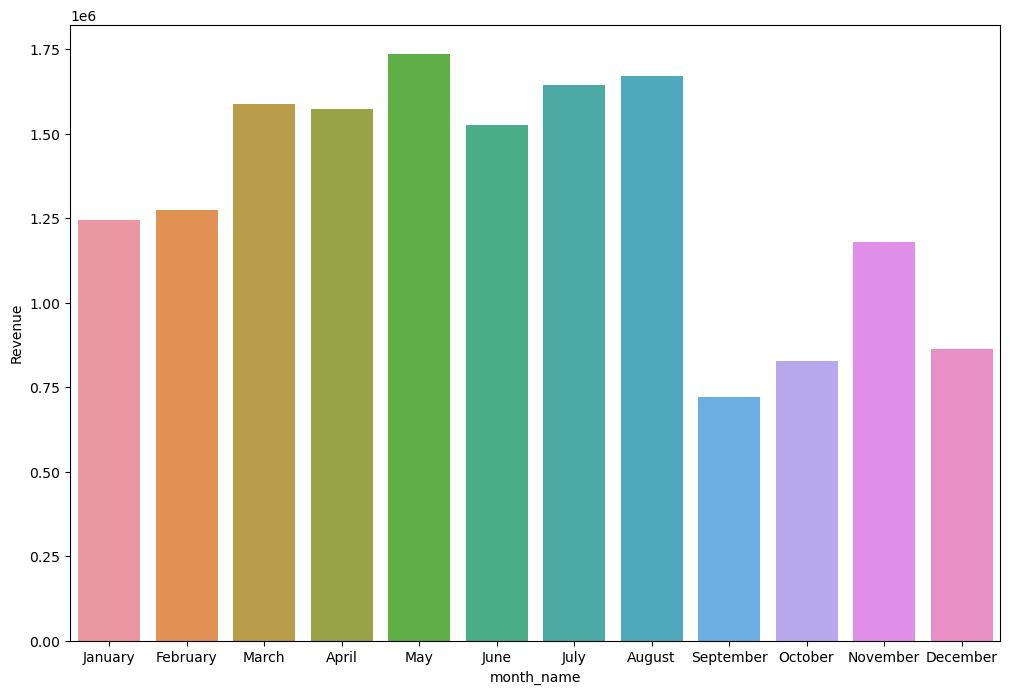

In [91]:
# Sales by Month

plt.figure(figsize=(12, 8))
s6=data.groupby(['month','month_name']).Revenue.sum().reset_index()
sns.barplot(x='month_name', y='Revenue', data=s6)

Text(0.5, 0, 'Quantity')

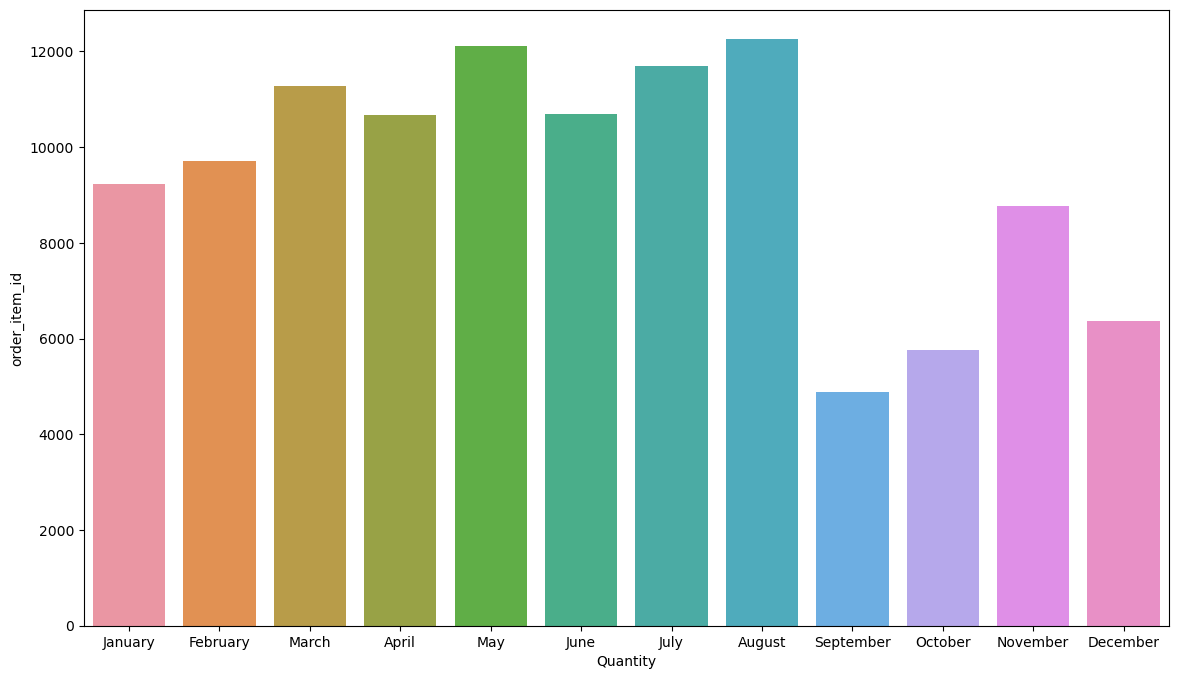

In [92]:
# Quantity by Month

plt.figure(figsize=(14,8))
d4=data.groupby(['month','month_name']).order_item_id.count().reset_index()
sns.barplot(x='month_name', y='order_item_id', data=d4)
plt.xlabel('Quantity')

<AxesSubplot:xlabel='day', ylabel='Revenue'>

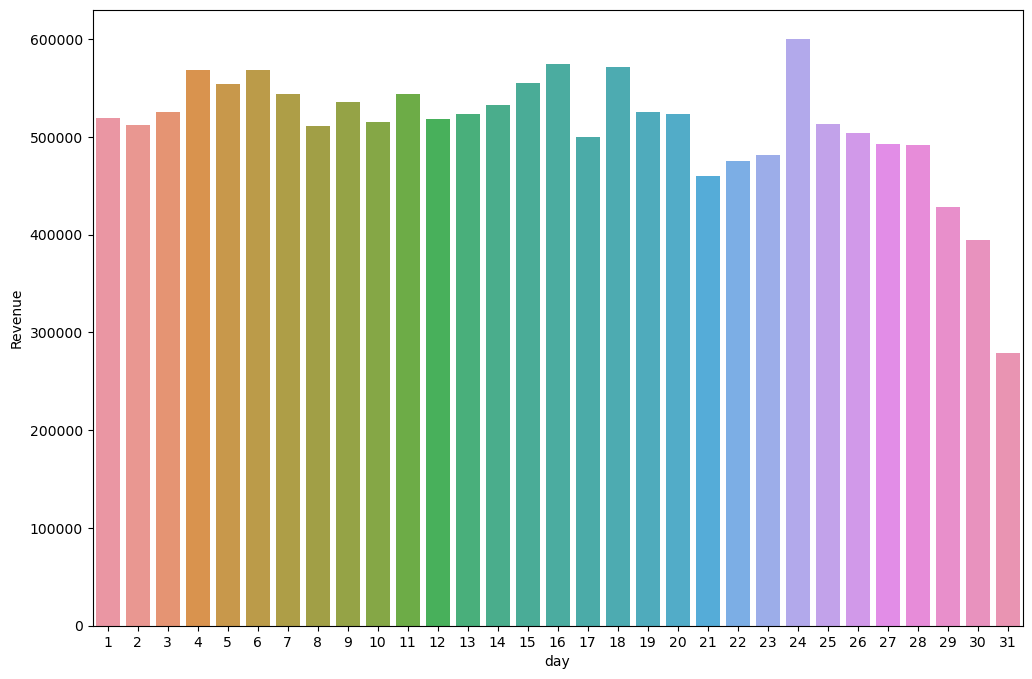

In [93]:
# Sales by day

plt.figure(figsize=(12, 8))
s7=data.groupby('day').Revenue.sum().reset_index()
sns.barplot(x='day', y='Revenue', data=s7)

Text(0.5, 0, 'Quantity')

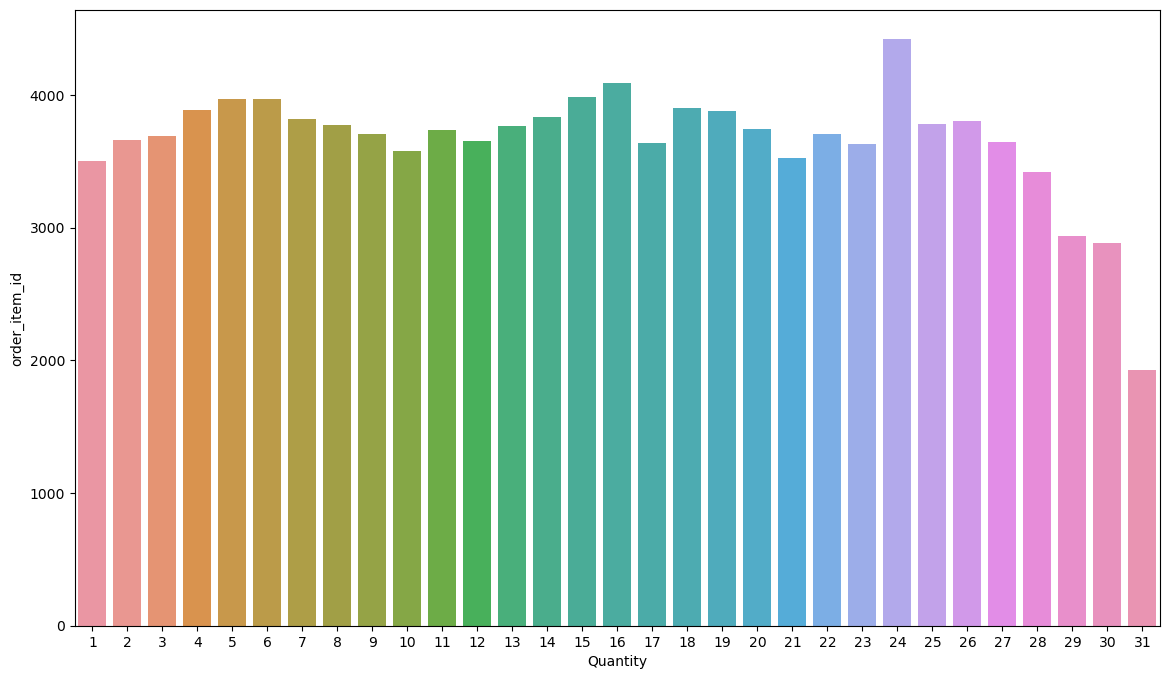

In [94]:
# Quantity by Month

plt.figure(figsize=(14,8))
d5=data.groupby('day').order_item_id.count().reset_index()
sns.barplot(x='day', y='order_item_id', data=d5)
plt.xlabel('Quantity')

<AxesSubplot:xlabel='payment_type', ylabel='payment_value'>

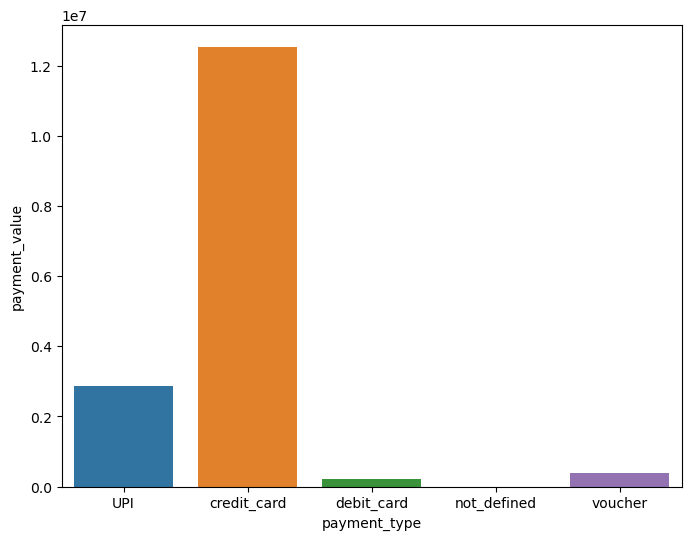

In [95]:
# Sales by payment method

plt.figure(figsize=(8,6))
s8=order_payments.groupby('payment_type').payment_value.sum().reset_index()
sns.barplot(x='payment_type', y='payment_value', data=s8)

#### f. Popular Products by month, seller, state, category

In [96]:
# Popular product by month
pop_prod_month=data.groupby(['month','month_name', data.product_id]).product_id.count().rename('Count').reset_index()

In [97]:
pop_prod_month=pop_prod_month.sort_values(by=['month','Count'], ascending=(True, False))

In [98]:
pop_prod_month.drop(columns='month', inplace=True)

In [99]:
pop_prod_month

,month_name,product_id,Count
3088,January,aca2eb7d00ea1a7b8ebd4e68314663af,122
1489,January,54d9ac713e253fa1fae9c8003b011c2a,76
2872,January,Unknown,60
960,January,36f60d45225e60c7da4558b070ce4b60,57
3768,January,d1c427060a0f73f6b889a5c7c61f2ac4,45
...,...,...,...
60801,December,ffbc83054b3741a8d67fc59d9cf9d42d,1
60802,December,ffc0b406806006602c5853b00ab5f7fd,1
60803,December,ffce5ed9e0bcc2e46796b988cdac733b,1
60804,December,ffcfaba393e8ef71937c6e8421bc2868,1


In [100]:
# Popular product by seller
pop_prod_seller=data.groupby([data.seller_id, data.product_id]).product_id.count().rename('Count').reset_index()
pop_prod_seller=pop_prod_seller.sort_values(by='Count', ascending=False)
pop_prod_seller

,seller_id,product_id,Count
22169,Unknown,Unknown,775
21025,955fee9216a65b617aa5c0531780ce60,aca2eb7d00ea1a7b8ebd4e68314663af,527
4645,1f50f920176fa81dab994f9023523100,422879e10f46682990de24d770e7f83d,484
9881,4a3ca9315b744ce9f8e9374361493884,99a4788cb24856965c36a24e339b6058,482
4643,1f50f920176fa81dab994f9023523100,389d119b48cf3043d311335e499d9c6b,392
...,...,...,...
14810,6edacfd9f9074789dad6d62ba7950b9c,759be9d8dec6d1622e7b0b8be27740fe,1
14809,6edacfd9f9074789dad6d62ba7950b9c,753d279facc7d9ca90f2e8bfb2bab052,1
14808,6edacfd9f9074789dad6d62ba7950b9c,73c32b5af96fecd16fed3efde88ea2c6,1
14806,6edacfd9f9074789dad6d62ba7950b9c,6feea907f9f949ce09d7d8ed626fd89a,1


In [101]:
# Popular product by state

pop_prod_state=data.groupby([data.customer_state, data.product_id]).product_id.count().rename('Count').reset_index()
pop_prod_state=pop_prod_state.sort_values(by='Count', ascending=False)
pop_prod_state

,customer_state,product_id,Count
15218,Andhra Pradesh,Unknown,467
16354,Andhra Pradesh,aca2eb7d00ea1a7b8ebd4e68314663af,345
14598,Andhra Pradesh,99a4788cb24856965c36a24e339b6058,294
6379,Andhra Pradesh,422879e10f46682990de24d770e7f83d,283
8042,Andhra Pradesh,53b36df67ebb7c41585e8d54d6772e08,225
...,...,...,...
24488,Arunachal Pradesh,2f9c2888168b8c2d8e625905f3737057,1
24491,Arunachal Pradesh,30001d6521e7d5826eb1881050cea7e7,1
24492,Arunachal Pradesh,30360c8b0b2ac6918f53ab66bc3c306f,1
24493,Arunachal Pradesh,306b0c58328826c0564cbc520787d508,1


In [102]:
# Popular product by category

pop_prod_category=data.groupby([data.product_category_name, data.product_id]).product_id.count().rename('Count').reset_index()
pop_prod_category=pop_prod_category.sort_values(by='Count', ascending=False)
pop_prod_category

,product_category_name,product_id,Count
31368,Unknown,Unknown,775
14154,Furniture_Decor,aca2eb7d00ea1a7b8ebd4e68314663af,527
5002,Bed_Bath_Table,99a4788cb24856965c36a24e339b6058,488
15387,Garden_Tools,422879e10f46682990de24d770e7f83d,484
15356,Garden_Tools,389d119b48cf3043d311335e499d9c6b,392
...,...,...,...
13973,Furniture_Decor,9c62adfd2a4126042e0410e01a0f1630,1
13972,Furniture_Decor,9c4c75ab1ce7a32a6dab72d863cad23d,1
13970,Furniture_Decor,9bf850b04e5b1ec3f9e35aaf9a55ce52,1
13969,Furniture_Decor,9bd17c3e3b0cbbb8c17af66a7079407b,1


#### g. Popular categories by state, month

In [103]:
# Popular category by month

pop_cat_month=data.groupby(['month', 'month_name', data.product_category_name]).product_category_name.count().rename('Count').reset_index()
pop_cat_month=pop_cat_month.sort_values(by=['month', 'Count'], ascending=(True, False))
pop_cat_month.drop(columns='month', inplace=True)
pop_cat_month

,month_name,product_category_name,Count
6,January,Bed_Bath_Table,896
36,January,Furniture_Decor,794
13,January,Computers_Accessories,738
62,January,Sports_Leisure,734
40,January,Health_Beauty,713
...,...,...,...
800,December,Signaling_And_Security,2
756,December,Cds_Dvds_Musicals,1
769,December,Dvds_Blu_Ray,1
774,December,Fashion_Sport,1


In [104]:
# Popular category by state

pop_cat_month=data.groupby(['customer_state', data.product_category_name]).product_category_name.count().rename('Count').reset_index()
pop_cat_month=pop_cat_month.sort_values(by=['customer_state', 'Count'], ascending=(True, False))
pop_cat_month

,customer_state,product_category_name,Count
7,Andhra Pradesh,Bed_Bath_Table,7101
43,Andhra Pradesh,Health_Beauty,6020
65,Andhra Pradesh,Sports_Leisure,5327
39,Andhra Pradesh,Furniture_Decor,5239
15,Andhra Pradesh,Computers_Accessories,4859
...,...,...,...
1062,West Bengal,Construction_Tools_Safety,1
1064,West Bengal,Costruction_Tools_Garden,1
1067,West Bengal,Fashion_Male_Clothing,1
1076,West Bengal,Home_Confort,1


#### h. List top 10 most expensive products sorted by price

In [105]:
top_10_products=data.groupby(data.product_id).Revenue.sum().reset_index()
top_10_products=top_10_products.sort_values(by='Revenue', ascending=False).head(10)
top_10_products

,product_id,Revenue
24087,bb50f2e236e5eea0100680137654686c,67606.10
27040,d1c427060a0f73f6b889a5c7c61f2ac4,60976.03
14068,6cdd53843498f92890544667809f1595,59093.99
19742,99a4788cb24856965c36a24e339b6058,51071.60
27614,d6160fb7873f184099d9bc95e30376af,50326.18
8051,3dd2a17168ec895c781a9191c1e95ad7,48212.22
22113,aca2eb7d00ea1a7b8ebd4e68314663af,44820.76
12351,5f504b3a1c75b73d6151be81eb05bdc9,41725.81
4996,25c38557cf793876c5abdd5931f922db,40311.95
10867,53b36df67ebb7c41585e8d54d6772e08,39957.93


### 2. Performing Customers/sellers Segmentation

#### a. Divide the customers into groups based on the revenue generated 

In [106]:
a1=data.groupby('customer_id').Revenue.sum().reset_index()

In [107]:
a1['Group']=pd.qcut(a1['Revenue'], 10, labels=False)

In [108]:
a1[['customer_id', 'Group']]

,customer_id,Group
0,00012a2ce6f8dcda20d059ce98491703,5
1,000161a058600d5901f007fab4c27140,2
2,0001fd6190edaaf884bcaf3d49edf079,7
3,0002414f95344307404f0ace7a26f1d5,7
4,000379cdec625522490c315e70c7a9fb,5
...,...,...
99435,fffecc9f79fd8c764f843e9951b11341,3
99436,fffeda5b6d849fbd39689bb92087f431,2
99437,ffff42319e9b2d713724ae527742af25,8
99438,ffffa3172527f765de70084a7e53aae8,1


#### b. Divide the sellers into groups based on the revenue generated 

In [109]:
a2=data.groupby('seller_id').Revenue.sum().reset_index()

In [110]:
a2['Group']=pd.qcut(a1['Revenue'], 10, labels=False)

In [111]:
a2[['seller_id', 'Group']]

,seller_id,Group
0,0015a82c2db000af6aaaf3ae2ecb0532,5
1,001cca7ae9ae17fb1caed9dfb1094831,2
2,001e6ad469a905060d959994f1b41e4f,7
3,002100f778ceb8431b7a1020ff7ab48f,7
4,003554e2dce176b5555353e4f3555ac8,5
...,...,...
3091,ffcfefa19b08742c5d315f2791395ee5,3
3092,ffdd9f82b9a447f6f8d4b91554cc7dd3,7
3093,ffeee66ac5d5a62fe688b9d26f83f534,6
3094,fffd5413c0700ac820c7069d66d98c89,6


### 3. Cross-Selling (Which products are selling together) Hint: We need to find which of the top 10 combinations of products are selling together in each transaction. (combination of 2 or 3 buying together)

In [112]:
q1=pd.crosstab(data.order_id,data.product_category_name)

In [113]:
q1

product_category_name,Agro_Industry_And_Commerce,Air_Conditioning,Art,Arts_And_Craftmanship,Audio,Auto,Baby,Bed_Bath_Table,Books_General_Interest,Books_Imported,...,Signaling_And_Security,Small_Appliances,Small_Appliances_Home_Oven_And_Coffee,Sports_Leisure,Stationery,Tablets_Printing_Image,Telephony,Toys,Unknown,Watches_Gifts
order_id,,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00018f77f2f0320c557190d7a144bdd3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000229ec398224ef6ca0657da4fc703e,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00024acbcdf0a6daa1e931b038114c75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00042b26cf59d7ce69dfabb4e55b4fd9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fffcd46ef2263f404302a634eb57f7eb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fffce4705a9662cd70adb13d4a31832d,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [114]:
for i in q1:
    q1[i]=q1[i].apply(lambda x: True if x>0 else False)

In [115]:
q1

product_category_name,Agro_Industry_And_Commerce,Air_Conditioning,Art,Arts_And_Craftmanship,Audio,Auto,Baby,Bed_Bath_Table,Books_General_Interest,Books_Imported,...,Signaling_And_Security,Small_Appliances,Small_Appliances_Home_Oven_And_Coffee,Sports_Leisure,Stationery,Tablets_Printing_Image,Telephony,Toys,Unknown,Watches_Gifts
order_id,,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
00018f77f2f0320c557190d7a144bdd3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
000229ec398224ef6ca0657da4fc703e,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
00024acbcdf0a6daa1e931b038114c75,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
00042b26cf59d7ce69dfabb4e55b4fd9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
fffcd46ef2263f404302a634eb57f7eb,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
fffce4705a9662cd70adb13d4a31832d,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [116]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [117]:
from mlxtend.frequent_patterns import fpmax

In [118]:
q2=fpmax(q1, min_support=0.000001, use_colnames=True).tail(10).reset_index(drop=True)

In [119]:
q2[['itemsets']]

,itemsets
0,"(Sports_Leisure, Watches_Gifts)"
1,"(Housewares, Health_Beauty)"
2,"(Computers_Accessories, Housewares)"
3,"(Sports_Leisure, Housewares)"
4,"(Housewares, Bed_Bath_Table)"
5,"(Computers_Accessories, Furniture_Decor)"
6,"(Furniture_Decor, Health_Beauty)"
7,"(Computers_Accessories, Bed_Bath_Table)"
8,"(Sports_Leisure, Computers_Accessories, Health..."
9,"(Bed_Bath_Table, Health_Beauty)"


### 4. Customer Behaviour

#### a. How customers are paying?


In [120]:
customer_payments=pd.merge(order_payments, orders, on='order_id')

In [121]:
customer_payments.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,4/25/2018 22:01,4/25/2018 22:15,5/2/2018 15:20,5/9/2018 17:36,5/22/2018 0:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,6/26/2018 11:01,6/26/2018 11:18,6/28/2018 14:18,6/29/2018 20:32,7/16/2018 0:00
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,12/12/2017 11:19,12/14/2017 9:52,12/15/2017 20:13,12/18/2017 17:24,1/4/2018 0:00


In [122]:
a1=customer_payments.groupby('payment_type').customer_id.count()

In [123]:
a1

payment_type
UPI            19784
credit_card    76795
debit_card      1529
not_defined        3
voucher         5775
Name: customer_id, dtype: int64

<AxesSubplot:ylabel='customer_id'>

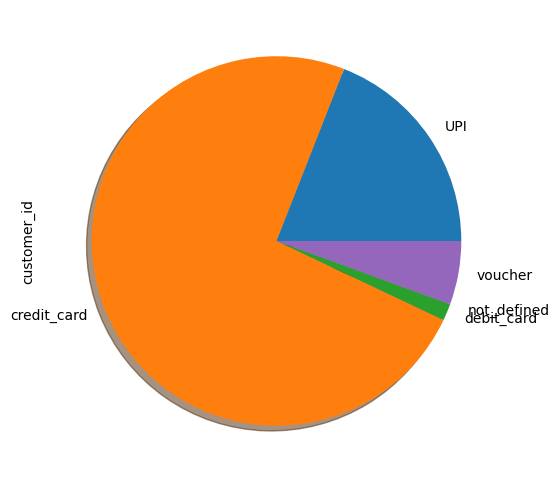

In [124]:
a1.plot.pie(y='payment_type',figsize=(8, 6), shadow=True)

#### b. Which payment channels are used by most customers?

<AxesSubplot:xlabel='payment_type'>

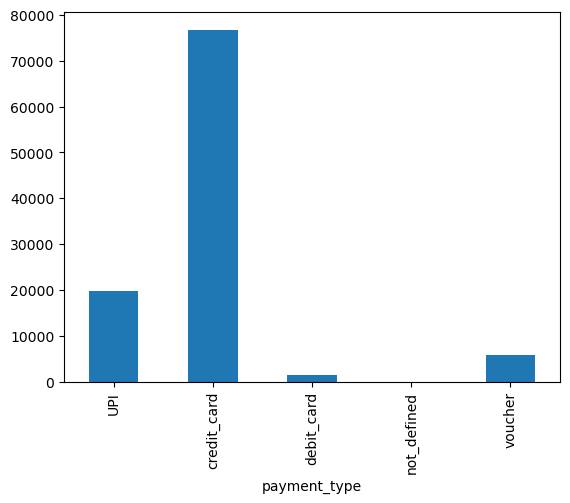

In [125]:
a1.plot(kind='bar')

### 5. Customer satisfaction towards category & product

#### a. Which categories (top 10) are maximum rated & minimum rated?

In [126]:
#Maximum rated top 10 product categories

maximum_rated_cat=data.groupby('product_category_name').review_score.sum().reset_index().sort_values(by='review_score', ascending=False).head(10)

In [127]:
maximum_rated_cat.reset_index(drop=True, inplace=True)

In [128]:
maximum_rated_cat

,product_category_name,review_score
0,Bed_Bath_Table,43636
1,Health_Beauty,40118
2,Sports_Leisure,35616
3,Furniture_Decor,32716
4,Computers_Accessories,30953
5,Housewares,28235
6,Watches_Gifts,24016
7,Telephony,17907
8,Garden_Tools,17572
9,Auto,17193


In [129]:
#Minimum rated top 10 product categories

minimum_rated_cat=data.groupby('product_category_name').review_score.sum().reset_index().sort_values(by='review_score', ascending=True).head(10)

In [130]:
minimum_rated_cat.reset_index(drop=True, inplace=True)

In [131]:
minimum_rated_cat

,product_category_name,review_score
0,Security_And_Services,5
1,Fashion_Childrens_Clothes,36
2,La_Cuisine,53
3,Cds_Dvds_Musicals,65
4,Arts_And_Craftmanship,99
5,Home_Comfort_2,101
6,Diapers_And_Hygiene,127
7,Fashion_Sport,132
8,Flowers,139
9,Furniture_Mattress_And_Upholstery,145


#### b. Which products (top10) are maximum rated & minimum rated?

In [132]:
#Maximum rated top 10 products

max_rated_products=data.groupby('product_id').review_score.sum().reset_index().sort_values(by='review_score', ascending=False).head(10)

In [133]:
max_rated_products.reset_index(drop=True, inplace=True)

In [134]:
max_rated_products

,product_id,review_score
0,aca2eb7d00ea1a7b8ebd4e68314663af,2112
1,422879e10f46682990de24d770e7f83d,1920
2,99a4788cb24856965c36a24e339b6058,1896
3,389d119b48cf3043d311335e499d9c6b,1612
4,368c6c730842d78016ad823897a372db,1531
5,53759a2ecddad2bb87a079a1f1519f73,1448
6,d1c427060a0f73f6b889a5c7c61f2ac4,1432
7,53b36df67ebb7c41585e8d54d6772e08,1348
8,Unknown,1338
9,154e7e31ebfa092203795c972e5804a6,1264


In [135]:
#Minimum rated top 10 products

min_rated_products=data.groupby('product_id').review_score.sum().reset_index().sort_values(by='review_score', ascending=True).head(10)

In [136]:
min_rated_products.reset_index(drop=True, inplace=True)

In [137]:
min_rated_products

,product_id,review_score
0,e03071a2d2410c9ef2be47b508cac95f,1
1,b56ff361e0733eebc1d010432936b706,1
2,7ed8c74b7ad2f1790a24a24c071da537,1
3,43c81702c9aca96af077286a5b2525b9,1
4,1da4613d4f7e10e1554538b46dd16486,1
5,ed9d81a5043f74cbe0e3db315770af45,1
6,5096e827f6152df3974343e735a52dc9,1
7,1da0fbb35cfdc9fcb6d48dfddca69513,1
8,1d9c9e0532fb481c0f89c3b20cec62e6,1
9,8ec6aedf40e1175c5446134c40931706,1


#### c. Average rating by location, seller, product, category, month etc.

In [138]:
# Average rating by location

av_rating_location=data.groupby('customer_state').review_score.mean().reset_index()

In [139]:
av_rating_location

,customer_state,review_score
0,Andhra Pradesh,4.005607
1,Arunachal Pradesh,4.068720
2,Chhattisgarh,4.038983
3,Delhi,4.038400
4,Goa,4.800000
5,Gujarat,4.039626
6,Haryana,4.101190
7,Himachal Pradesh,4.008284
8,Jammu & Kashmir,4.033542
9,Karnataka,4.029721


In [140]:
# Average rating by seller

av_rating_seller=data.groupby('seller_id').review_score.mean().reset_index()

In [141]:
av_rating_seller

,seller_id,review_score
0,0015a82c2db000af6aaaf3ae2ecb0532,3.666667
1,001cca7ae9ae17fb1caed9dfb1094831,3.874477
2,001e6ad469a905060d959994f1b41e4f,1.000000
3,002100f778ceb8431b7a1020ff7ab48f,4.054545
4,003554e2dce176b5555353e4f3555ac8,5.000000
...,...,...
3091,ffcfefa19b08742c5d315f2791395ee5,1.000000
3092,ffdd9f82b9a447f6f8d4b91554cc7dd3,4.250000
3093,ffeee66ac5d5a62fe688b9d26f83f534,4.214286
3094,fffd5413c0700ac820c7069d66d98c89,3.885246


In [142]:
# Average rating by product

av_rating_product=data.groupby('product_id').review_score.mean().reset_index()
av_rating_product

,product_id,review_score
0,00066f42aeeb9f3007548bb9d3f33c38,5.0
1,00088930e925c41fd95ebfe695fd2655,4.0
2,0009406fd7479715e4bef61dd91f2462,1.0
3,000b8f95fcb9e0096488278317764d19,5.0
4,000d9be29b5207b54e86aa1b1ac54872,5.0
...,...,...
32947,fff6177642830a9a94a0f2cba5e476d1,4.5
32948,fff81cc3158d2725c0655ab9ba0f712c,4.0
32949,fff9553ac224cec9d15d49f5a263411f,5.0
32950,fffdb2d0ec8d6a61f0a0a0db3f25b441,5.0


In [143]:
# Average rating by category

av_rating_category=data.groupby('product_category_name').review_score.mean().reset_index()
av_rating_category

,product_category_name,review_score
0,Agro_Industry_And_Commerce,4.000000
1,Air_Conditioning,3.919192
2,Art,3.918660
3,Arts_And_Craftmanship,4.125000
4,Audio,3.818681
...,...,...
67,Tablets_Printing_Image,4.048193
68,Telephony,3.939934
69,Toys,4.146709
70,Unknown,3.154871


In [144]:
# Average rating by month

av_rating_month=data.groupby(['month', 'month_name']).review_score.mean().reset_index()
av_rating_month[['month_name', 'review_score']]

,month_name,review_score
0,January,3.958473
1,February,3.810800
2,March,3.786544
3,April,4.046736
4,May,4.126475
5,June,4.165015
6,July,4.187045
7,August,4.205124
8,September,4.122420
9,October,4.009015


In [145]:
# Average rating by year

av_rating_year=data.groupby('year').review_score.mean().reset_index()
av_rating_year

,year,review_score
0,2016,3.486979
1,2017,4.040906
2,2018,4.012700


In [146]:
# Freight analysis by location and time

freight_location=data.groupby('customer_state').freight_value.mean().reset_index()

In [147]:
freight_location

,customer_state,freight_value
0,Andhra Pradesh,18.173353
1,Arunachal Pradesh,19.990000
2,Chhattisgarh,20.536082
3,Delhi,23.025678
4,Goa,25.393000
5,Gujarat,21.552523
6,Haryana,19.567591
7,Himachal Pradesh,21.741562
8,Jammu & Kashmir,22.193144
9,Karnataka,22.837485


<AxesSubplot:>

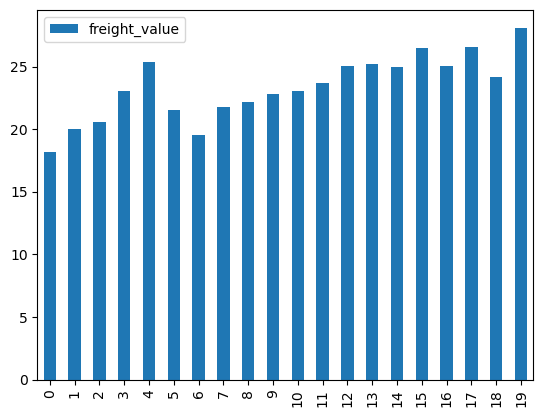

In [148]:
freight_location.plot(kind='bar')

In [149]:
# Freight value by month

In [150]:
freight_month=data.groupby(['month','month_name']).freight_value.mean().reset_index()

In [151]:
freight_month[['month_name', 'freight_value']]

,month_name,freight_value
0,January,18.881833
1,February,18.725046
2,March,20.354372
3,April,20.187815
4,May,19.254513
5,June,21.267506
6,July,21.405061
7,August,19.815197
8,September,19.639808
9,October,19.485804


C:\Users\NSS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month_name', ylabel='freight_value'>

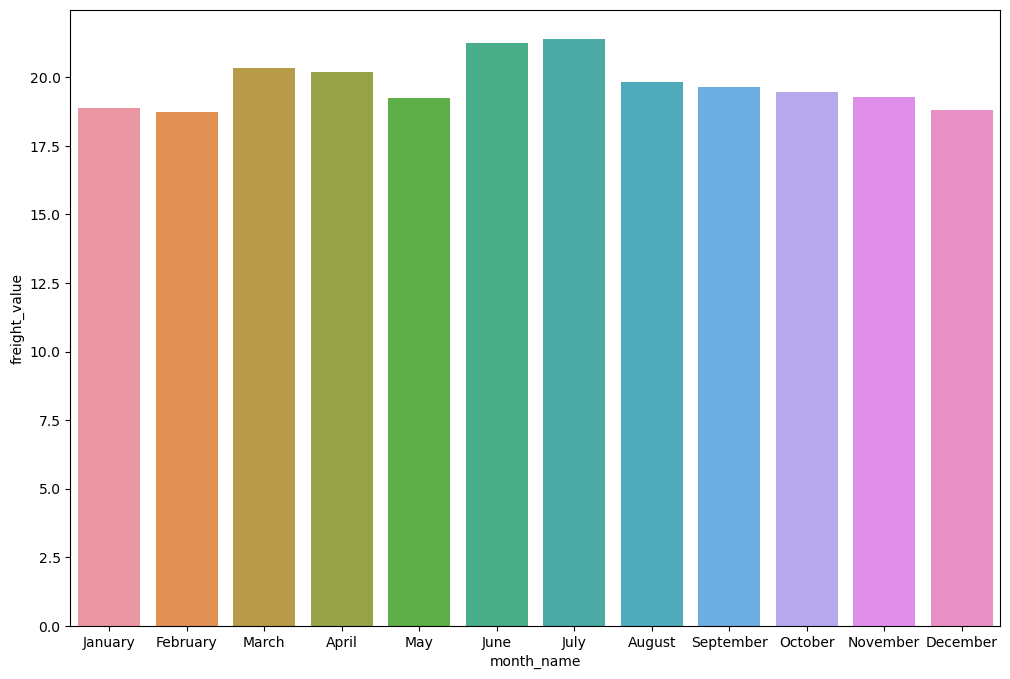

In [152]:
plt.figure(figsize=(12, 8))
sns.barplot(freight_month.month_name, freight_month.freight_value)